In [50]:
#!pip install xgboost
#!pip install cx_Oracle
#!pip install pandasql
from datetime import datetime, date
import numpy as np
from numpy import array_str
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost.sklearn import XGBRegressor
from sklearn import metrics
import pandas as pd
import matplotlib
%matplotlib inline
import cx_Oracle as db
from xgboost import plot_importance
from sklearn.metrics import accuracy_score
from xgboost import  DMatrix
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from pandasql import sqldf 


In [51]:
import pandas as pd
df = pd.read_csv('train(preprocessing_sex)')

import pandas as pd
df_public = pd.read_csv('public.csv')

#測試集
cat_others=['SEX',\
'AGE',\
'NARROW_PITCH_RANGE',\
'DECREASED_VOLUME',\
'FATIGUE',\
'DRYNESS',\
'LUMPING',\
'HEARTBURN',\
'CHOKING',\
'EYE_DRYNESS',\
'PND',\
'SMOKING',\
'PPD',\
'DRINKING',\
'FREQUENCY',\
'DIURNAL_PATTERN',\
'ONSET_OF_DYSPHONIA',\
'NOISE_AT_WORK',\
'OCCUPATIONAL_VOCAL_DEMAND',\
'DIABETES',\
'HYPERTENSION',\
'CAD',\
'HEAD_AND_NECK_CANCER',\
'HEAD_INJURY',\
'CVA',\
'VOICE_HANDICAP_INDEX']

#Public集
cat_others_public=['SEX',\
'AGE',\
'NARROW_PITCH_RANGE',\
'DECREASED_VOLUME',\
'FATIGUE',\
'DRYNESS',\
'LUMPING',\
'HEARTBURN',\
'CHOKING',\
'EYE_DRYNESS',\
'PND',\
'SMOKING',\
'PPD',\
'DRINKING',\
'FREQUENCY',\
'DIURNAL_PATTERN',\
'ONSET_OF_DYSPHONIA',\
'NOISE_AT_WORK',\
'OCCUPATIONAL_VOCAL_DEMAND',\
'DIABETES',\
'HYPERTENSION',\
'CAD',\
'HEAD_AND_NECK_CANCER',\
'HEAD_INJURY',\
'CVA',\
'VOICE_HANDICAP_INDEX']
#讀取訓練資料
X = df[cat_others]
y = df['DISEASE_CATEGORY'] 

#讀取要比賽的資料集
X_public = df_public[cat_others_public]

FileNotFoundError: [Errno 2] No such file or directory: 'train(preprocessing_sex)'

800
RMSE: 1.1312847631458411


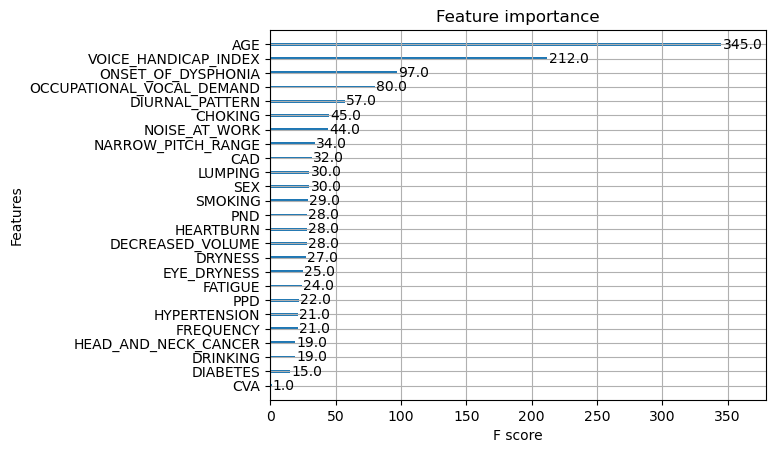

In [52]:
X_public = df_public[cat_others_public]

#分成測試及訓練資料 0.8:0.2 的比例
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(len(X_train))     

#用回歸找出重要性
model = xgb.XGBRegressor(n_estimators=30, learning_rate=0.1, random_state=123)
    # 訓練模型

model.fit(X_train, y_train)
    # 用測試集評估模型表現

#預測    
y_pred = model.predict(X_test)
y_train_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

##找出關鍵因子
xgb.plot_importance(model)
#modelc = XGBClassifier.fit(X_train, y_train)
metrics.explained_variance_score(y_test, y_pred)
score=model.get_booster().get_fscore()
new = pd.DataFrame(y_pred)

#new.insert(new.shape[1],'Cate',y_pred)
#new_tmp=pd.concat([y_test,new],join='outer')
#ddg = y_test.reset_index(drop=True)
#new_tmp = pd.concat([new, ddg], axis=1)
#new_tmp.to_csv("1.csv")

In [53]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import time

start_time = time.time()


le = LabelEncoder()
y_train_encode = le.fit_transform(y_train)

#lt = LabelEncoder()
y_test_encode = le.fit_transform(y_test)

params = {
    'objective': 'multi:softmax',
    'num_class': len(df['DISEASE_CATEGORY'].unique()),
    'max_depth': 9,
    'learning_rate': 0.1,
    'gamma': 1,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'n_estimators': 300
}

# 創建模型
model = xgb.XGBRFClassifier(**params)
#X_train, X_test, y_train, y_test
# 訓練模型
model.fit(X_train, y_train_encode)

# 在測試集上評估模型
predictions = model.predict(X_test)
report = classification_report(y_test_encode, predictions)


pred_public = model.predict(X_public)
#report = classification_report(y_test, predictions)

print(report)

 
pred_public_decode=le.inverse_transform(pred_public)
 
print(pred_public_decode)


new = pd.DataFrame(pred_public_decode)
new = new.set_axis(['DISEASE_CATEGORY'], axis=1, inplace=False)
public_role = df_public['ROLE_ID'] 

new_tmp = pd.concat([public_role, new], axis=1)
print(new_tmp)


new_tmp.to_csv("20230517_public_sex.csv")

end_time = time.time()
execution_time = end_time - start_time
print('time'+str(execution_time))

              precision    recall  f1-score   support

           0       0.35      0.47      0.40        15
           1       0.64      0.58      0.61        24
           2       0.67      0.67      0.67        36
           3       0.83      0.61      0.70        31
           4       0.77      0.77      0.77        13
           5       0.71      0.89      0.79        61
           6       0.50      0.25      0.33        20

    accuracy                           0.67       200
   macro avg       0.64      0.60      0.61       200
weighted avg       0.67      0.67      0.66       200

[6 1 3 6 3 2 3 3 6 2 3 4 6 6 6 6 3 6 1 6 3 6 2 6 6 3 6 6 2 6 3 7 6 3 2 6 1
 3 6 2 3 6 6 6 3 2 7 6 3 1 6 6 6 2 2 6 1 6 3 1 6 5 6 3 3 2 6 3 6 3 6 6 6 2
 3 6 3 6 6 6 6 6 3 6 5 2 6 2 3 6 1 3 6 6 2 2 1 2 3 7 6 6 6 6 3 2 3 3 6 6 6
 6 6 6 6 6 6 2 6 6 4 3 6 6 6 7 6 3 2 3 3 6 6 6 4 3 1 3 6 2 6 6 7 2 2 7 2 6
 4 6 6 3 6 2 1 6 6 3 3 3 2 1 6 3 5 2 2 6 3 6 6 2 2 5 6 1 3 6 3 2 2 1 6 6 6
 3 6 6 6 2 6 6 2 3 6 6 6 6 1

In [49]:
'''''''''''''''''import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# 定義參數的候選範圍
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.01, 0.001],
    'gamma': [0, 1, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'n_estimators': [100, 200, 900]
}

# 創建模型
model = xgb.XGBRFClassifier(objective='multi:softmax', num_class=len(df['DISEASE_CATEGORY'].unique()))

# 使用網格搜索進行參數調優
grid_search = GridSearchCV(model, param_grid, scoring='recall', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train_encode)

# 打印最佳參數組合
print("Best Parameters: ", grid_search.best_params_)

# 使用最佳參數構建最終模型
best_model = grid_search.best_estimator_

# 在測試集上評估模型
predictions = best_model.predict(X_test)
report = classification_report(y_test_encode, predictions)

# 打印分類報告
print(report)

# 將模型應用於新數據
pred_public = best_model.predict(X_public)
pred_public_decode = le.inverse_transform(pred_public)
new = pd.DataFrame(pred_public_decode)
new = new.set_axis(['DISEASE_CATEGORY'], axis=1, inplace=False)
public_role = df_public['ROLE_ID']
new_tmp = pd.concat([public_role, new], axis=1)
#new_tmp.to_csv("20230517_private3.csv", index=False) 


SyntaxError: EOF while scanning triple-quoted string literal (3058997718.py, line 41)